<h4> Tarea 1 Deep Learning Saul Antonio Martinez Melgoza </h4> 

In [2]:
import yfinance as yf
data = yf.download("AAPL", start="2010-01-01", end="2023-12-31")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [6]:
train_data = pd.DataFrame(data)

In [ ]:

train_data = train_data.copy()
train_data.columns = train_data.columns.droplevel(1) 

Price       Date      Open      High       Low     Close     Volume
0     2010-01-04  6.422877  6.455077  6.391279  6.440331  493729600
1     2010-01-05  6.458088  6.487880  6.417461  6.451467  601904800
2     2010-01-06  6.451466  6.477045  6.342226  6.348846  552160000
3     2010-01-07  6.372319  6.379843  6.291066  6.337109  477131200
4     2010-01-08  6.328684  6.379843  6.291368  6.379241  447610800


In [19]:
train_data.head()

Price,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.422877,6.455077,6.391279,6.440331,493729600
1,2010-01-05,6.458088,6.487880,6.417461,6.451467,601904800
2,2010-01-06,6.451466,6.477045,6.342226,6.348846,552160000
3,2010-01-07,6.372319,6.379843,6.291066,6.337109,477131200
4,2010-01-08,6.328684,6.379843,6.291368,6.379241,447610800


In [ ]:
df = train_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()

df['Target'] = df['Close'].shift(-1)  

df = df.dropna()
print(df.head())

Price      Open      High       Low     Close     Volume    Target
0      6.422877  6.455077  6.391279  6.440331  493729600  6.451467
1      6.458088  6.487880  6.417461  6.451467  601904800  6.348846
2      6.451466  6.477045  6.342226  6.348846  552160000  6.337109
3      6.372319  6.379843  6.291066  6.337109  477131200  6.379241
4      6.328684  6.379843  6.291368  6.379241  447610800  6.322966


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


X = scaled_data[:, :-1]  
y = scaled_data[:, -1]  

In [45]:
def create_sequences(X, y, sequence_length=60):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i+sequence_length])  
        y_seq.append(y[i+sequence_length])    
    return np.array(X_seq), np.array(y_seq)


sequence_length = 60
X_sequences, y_sequences = create_sequences(X, y, sequence_length)

print(f"X : {X_sequences.shape}") 
print(f"y : {y_sequences.shape}") 

X : (3459, 60, 5)
y : (3459,)


In [46]:
train_size = int(0.8 * len(X_sequences))

X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

print(f"Dimension entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimension Prueba: {X_test.shape}, {y_test.shape}")

Dimension entrenamiento: (2767, 60, 5), (2767,)
Dimension Prueba: (692, 60, 5), (692,)


In [44]:
def create_sequences(X, y, sequence_length=60):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i+sequence_length])  
        y_seq.append(y[i+sequence_length])    
    return np.array(X_seq), np.array(y_seq)


sequence_length = 60
X_sequences, y_sequences = create_sequences(X, y, sequence_length)

print(f"X dimension: {X_sequences.shape}")  
print(f"y dimension: {y_sequences.shape}") 

X dimension: (3459, 60, 5)
y dimension: (3459,)


In [43]:
train_size = int(0.8 * len(X_sequences))

X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

print(f"Dimension de datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimension de datos de prueba: {X_test.shape}, {y_test.shape}")

Dimension de datos de entrenamiento: (2767, 60, 5), (2767,)
Dimension de datos de prueba: (692, 60, 5), (692,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

c:\Users\Saul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0066 - mae: 0.0453 - val_loss: 0.0021 - val_mae: 0.0388
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 6.2841e-04 - mae: 0.0148 - val_loss: 0.0035 - val_mae: 0.0516
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 5.7889e-04 - mae: 0.0150 - val_loss: 0.0020 - val_mae: 0.0374
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7137e-04 - mae: 0.0147 - val_loss: 0.0011 - val_mae: 0.0262
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6171e-04 - mae: 0.0124 - val_loss: 0.0027 - val_mae: 0.0437
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.2353e-04 - mae: 0.0127 - val_loss: 0.0068 - val_mae: 0.0757
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.3972e-04 - mae: 0.0123 - val_loss: 9.1395e-04 - val_mae: 0.0249
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.6726e-04 - mae: 0.0130 - val_loss: 9.2361e-04 - val_mae: 0.0246
Epoch 9/50
87/87 ━━━━━━━━━━━

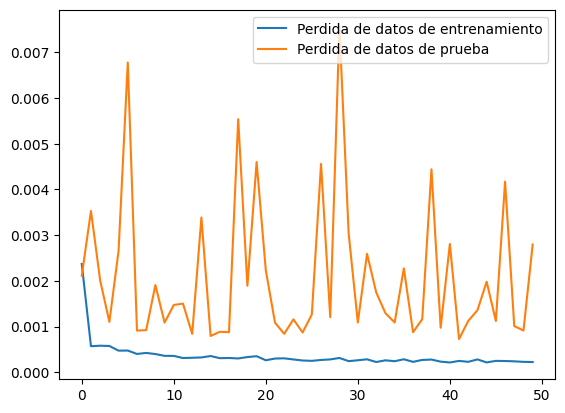

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perdida de datos de entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida de datos de prueba')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict(X_test)

# Inverse scaling to get actual prices
y_test_actual = np.concatenate([X_test[:, -1, :], y_test.reshape(-1, 1)], axis=1)[:, -1]
y_pred_actual = np.concatenate([X_test[:, -1, :], y_pred.reshape(-1, 1)], axis=1)[:, -1]

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


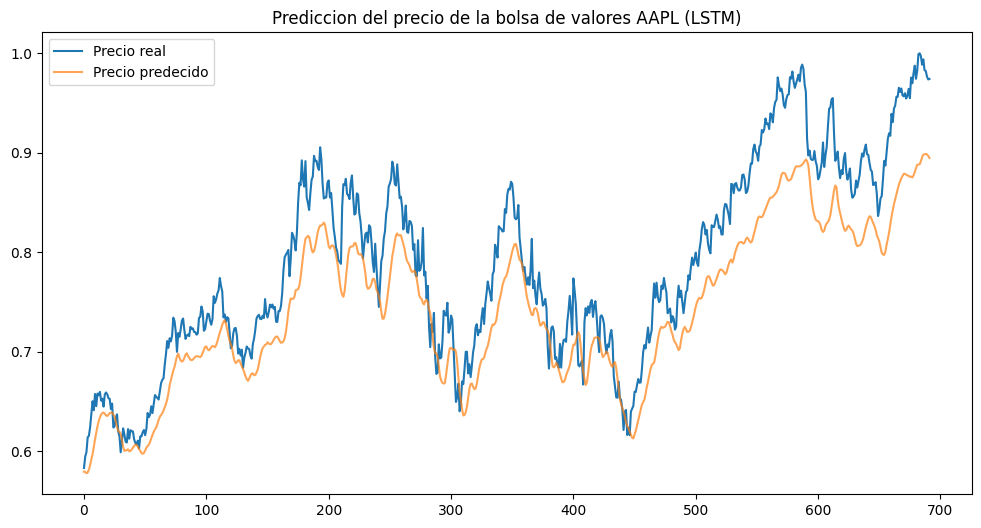

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Precio real')
plt.plot(y_pred_actual, label='Precio predecido', alpha=0.7)
plt.legend()
plt.title("Prediccion del precio de la bolsa de valores AAPL (LSTM)")
plt.show()